# Statistics for Data Understanding


## Outline of Discussion
1. Basic Univariate Statistics
    * Types of Variables
2. Population and Samples
    * Simple Random Sample
    * Stratified Sample
    * Cluster Sample
3. Summary Statistics
    * Central Tendency
    * Measures of Spread
    * Viewing Numerical Data
    * Histograms
    * Skewness
    * Using Matplotlib and Numpy
    * Using Pandas
    * Boxplots
    * Matrix Scatterplot
4. Basic Bivariate Statistics
    * Covariance
    * Correlation
5. Conclusion

## Basic Univariate Statistics

This is a primer on basic statistics that you will find useful. Right now, we are dealing with univariate statistics, which is the statistics of one variable. It is always important that you understand the statistics associated with any quantity you are dealing with. This workbook describe the concepts of arithmetic average, mode, median, histograms and distributions.

Some text and figures borrowed from **Mine Çetinkaya-Rundel of OpenIntro** who has made these publicly available.


## Types of Variables

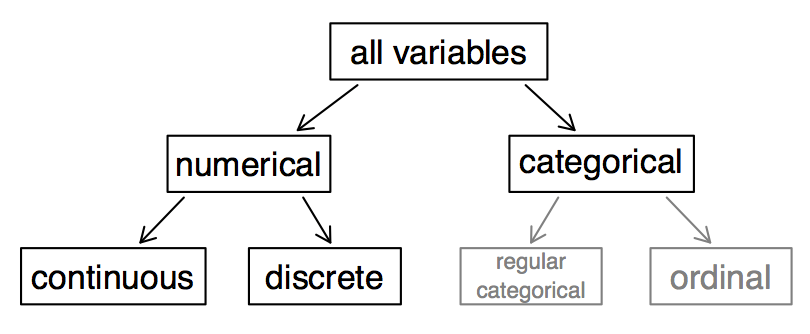

### Examples

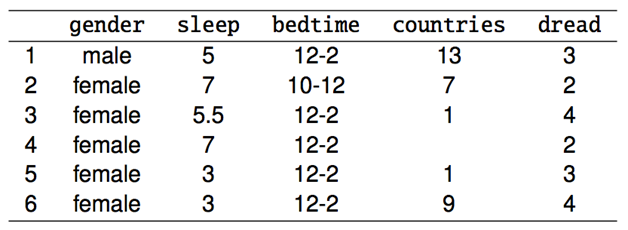


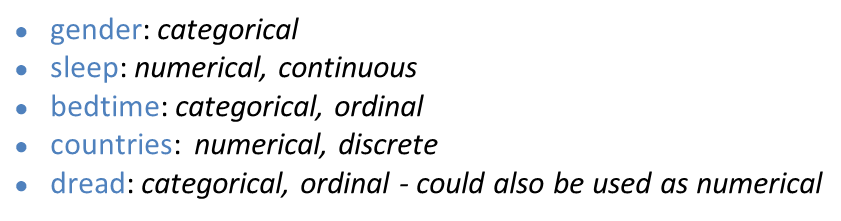

# Population and Samples

We often time deal with severely limited datasets, which are considered to be **samples** from the **population**. We may have tod deal with sampling bias depending on the type of sampling we are doing. 

For instance: we do not sample the entire drilled interval for core, but instead sample a few select points. Our analyses is naturally biased by our limited sampling. If you think about it, even our wells constitute a biased sample, because they are limited in number and areally sparse. There often is very little you can do about biased sample collections, but it is important to keep that in mind as you continue your analyses.

In general, in sociology (where surveys and response mining is critical), there are:

* Convenience sample: Individuals who are easily accessible are more likely to be included in the sample. (E.g. core samples).
* Non-response: If only a small fraction of the randomly sampled people choose to respond to a survey, the sample may no longer be representative of the population. 
* Voluntary response: Occurs when the sample consists of people who volunteer to respond because they have strong opinions on the issue. Such a sample will also not be representative of the population. (Yelp, Tripadvisor etc)


### Simple Random Sample

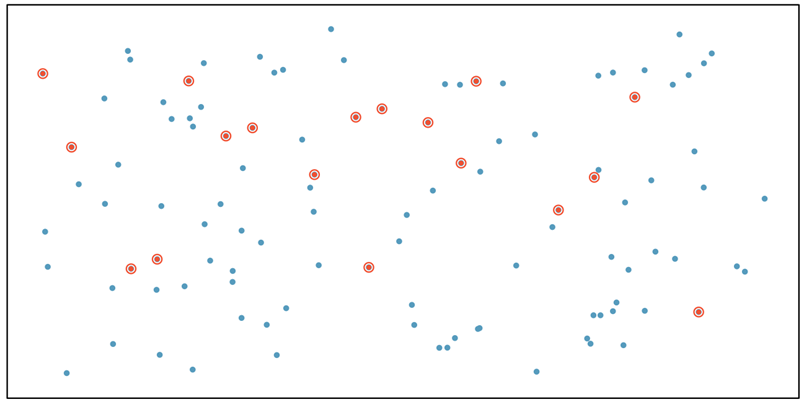

### Stratified Sample
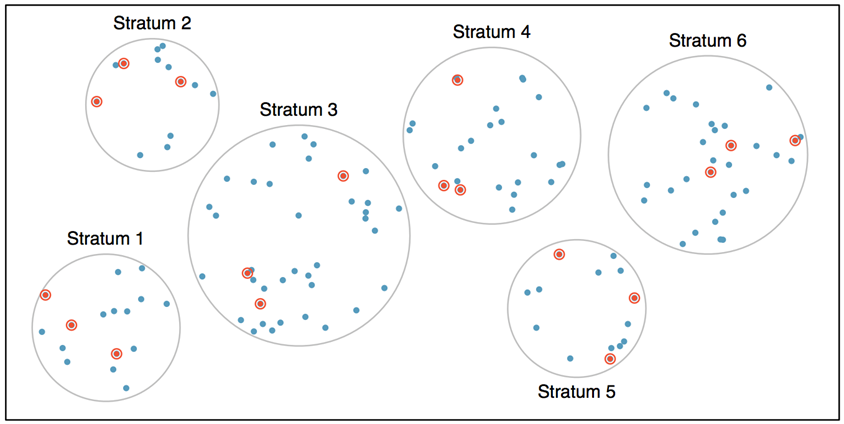

### Cluster Sample
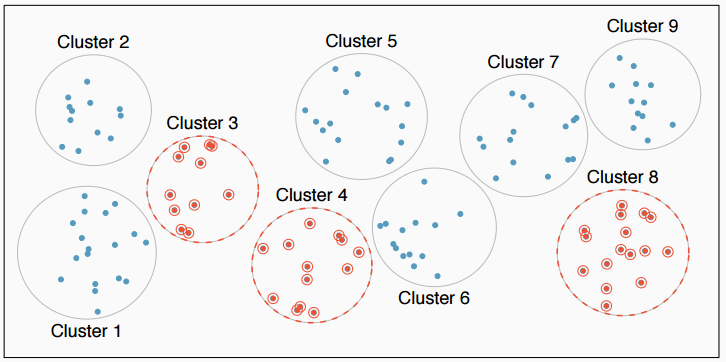

## Summary Statistics

### Central Tendency
These measures give you a feel for the data. By that, I am referring to plausible values or most likely values that new samples will take. For instance:
* If you are measuring the income of people in a sample of people, and want to predict what a new person's income is likely to be, you can use one of the measures below.
* If you have acquired and run measurements on several core samples and a new core plug turns up and you want to say something about its porosity. It would stand to reason to use any one of the measures below. 

It is important to note that by predicting some property for a new sample, we are not using any predictor (or secondary) variables. We are just making an educated guess based on a collection of univariate measurements. 

1. **Mean**

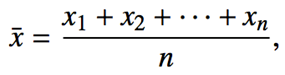

2. **Mode**: Most frequently occuring value

3. **Median**: 50% of all values are below the median and 50% of all values are larger than the median



**Questions to consider are**: Which of the above measures are impacted by outliers? When might it be misleading to use the mean? 

### Measures of Spread
Measures of central tendency give you a fairly good idea of the data under consideration but you would like to know more. How low (or how high) are possible values of the variable? Are certain sample points concentrated in a specific range of variable values or are they more evenly spread? 

1. **Standard deviation**: This is the square root of variance. Note in the formula below for variance, the **squared-deviations from the mean** are divided by **n-1** and not n. This is important especially for small values of 'n'. The reason why we artificially 'inflate' the variance is because **small sample sizes underestimate the population variance**. 
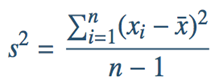
2. **Range**: Maximum - Minimum value
3. **Interquartile Range**: Q3 - Q1, where Q3 is the 75th percentile and Q1 is the 25th percentile.

**Questions to consider are**: Which of the above measures are impacted by outliers? When might it be misleading to use the standard deviations?

You have seen how this can be done earlier. **.describe** provides several measures, and we will see what some of the other measures are. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina' # This is just a formatting statement for the plot. 
%matplotlib inline

In [10]:
dataframe = pd.read_csv('CleanedUpCoreData.csv', header = 0)

# Also select a subset of the dataframe because we are not interested in the Depth variable
dataframe_subset = dataframe[['CorrectedPorosity', 'TOC', 'Calcite', 'Quartz']]
dataframe_subset
#dataframe.head()

,CorrectedPorosity,TOC,Calcite,Quartz
0,6.67,4.15,0.0,38.6
1,6.07,4.25,6.2,48.6
2,4.91,3.40,2.5,41.0
3,6.00,0.39,66.4,4.6
4,5.63,3.90,0.6,37.0
...,...,...,...,...
162,3.77,2.06,15.4,26.7
163,4.60,3.52,0.0,31.0
164,4.16,2.47,8.7,16.0
165,2.49,2.32,19.8,24.8


In [9]:
dataframe_subset.describe()

,CorrectedPorosity,TOC,Calcite,Quartz
count,167.000000,167.000000,167.000000,167.000000
mean,4.262934,3.770778,12.122156,27.963473
std,1.349560,1.625806,19.819573,13.875863
min,0.880000,0.390000,0.000000,0.000000
25%,3.405000,2.680000,0.000000,17.450000
50%,4.390000,3.900000,2.400000,29.700000
75%,5.205000,4.915000,12.700000,38.300000
max,8.050000,7.480000,78.600000,59.400000


When you run the code above, you can see the **number of samples, mean and standard deviation**. We also have the **minimum and maximum** of the data. 

If you were to sort the data in increasing order, then:
* The minimum value is the 0th percentile: No samples exist below the minimum value.
* The maximum value is the 100th percentile: No samples exist above the maximum
* The median is the 50th percentile: 50% of samples fall below the median
* 33% of samples are smaller than the 33rd percentile. 62% of samples are smaller than the 62nd percentile etc.

# Viewing Numerical Data

There are several methods to view numerical data. For instance, although not popular with what we do, **stacked dot plots** like the one shown below can be used to visualize data.
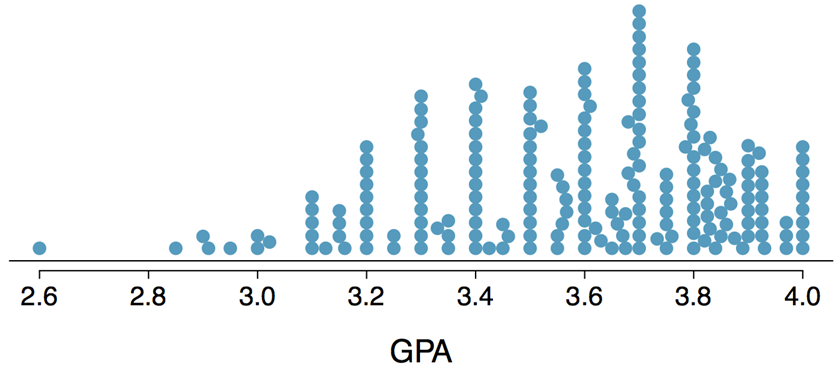

While there are several methods, we are going to focus on histograms and boxplots, because these are the most common methods. It is important that you are aware of what you can interpret from these plots.

## Histograms

Histograms are always useful to visualize because it gives you an idea of the distribution of the variables. You also begin to get a sense of which are the most frequently occuring numbers and also an idea of the outliers.Histograms provide a view of the data density. Higher bars represent where the data are relatively more common.

1. Histograms provide a view of the data density. Higher bars represent where the data are relatively more common.
2. Histograms are especially convenient for describing the shape of the data distribution.
3. The chosen bin width can alter the story the histogram is telling.

### Bin Width Selection
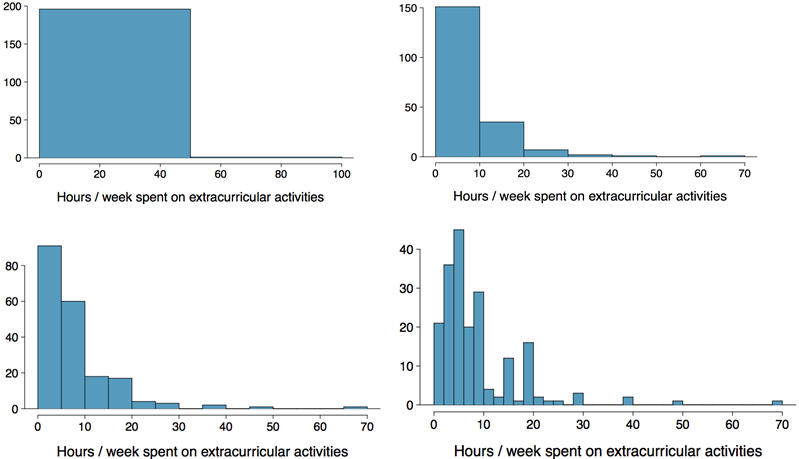



### Skewness

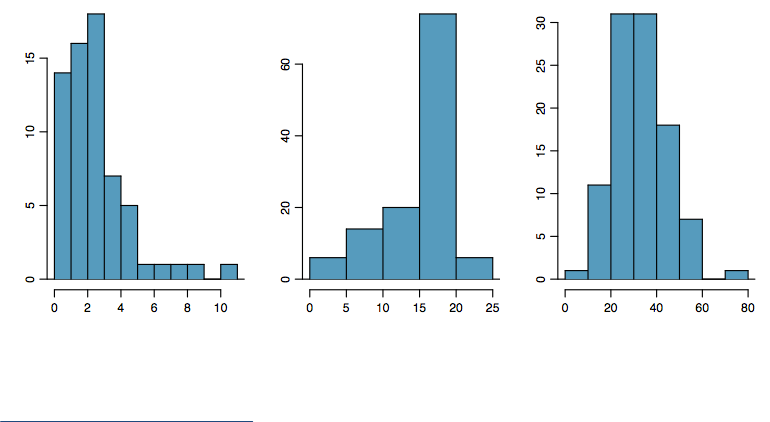

There are also several different ways in which you can plot histograms. Here are a few:
1. Using Matplotlib (plt.hist) on a Numpy array.
2. Directly using the Pandas command, dataframe.hist()
3. Using Seaborn

I will be illustrating all 3 methods below.

### 1. Using Matplotlib and Numpy
When you run the code below you will find that the histogram of porosity appears somewhat symmetric and has a mode of around 4.5 p.u. The format is **plt.hist (data array, number of bins, histogram or probability distribution function, color)**. 



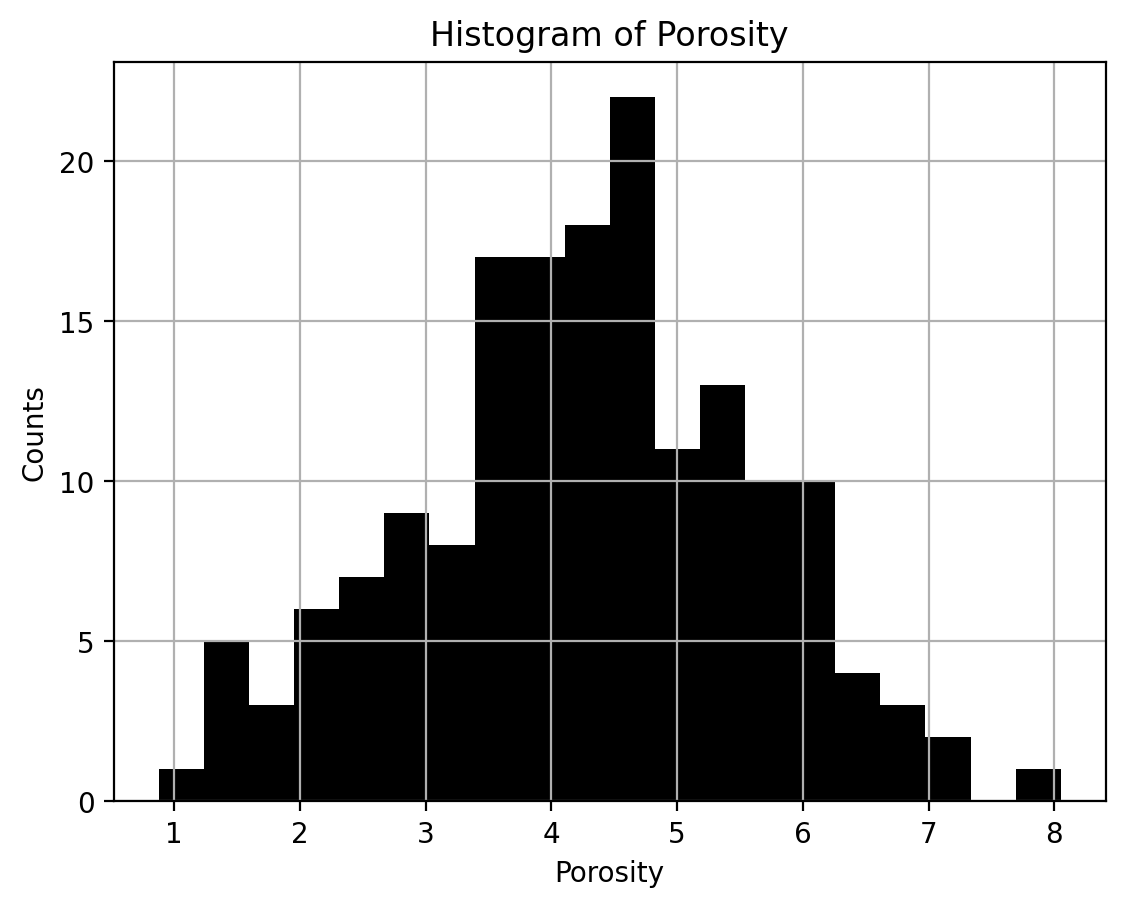

In [11]:
plt.xlabel('Porosity')
plt.ylabel('Counts')
plt.title('Histogram of Porosity')


plt.hist(dataframe_subset.CorrectedPorosity, bins = 20, density = 0, color = 'black') 
plt.grid(True)
plt.show()

Plotting the probability distribution function (pdf) requires using the option **density = 1**. The pdf gives you the probability of the variable occuring in a specified window of values. It is obtained simply by taking:


$$p(x_{left} < x < x_{right}) = \frac{$$Number of samples in $$x_{left}, x_{right}}{$$Total number of samples$$}$$

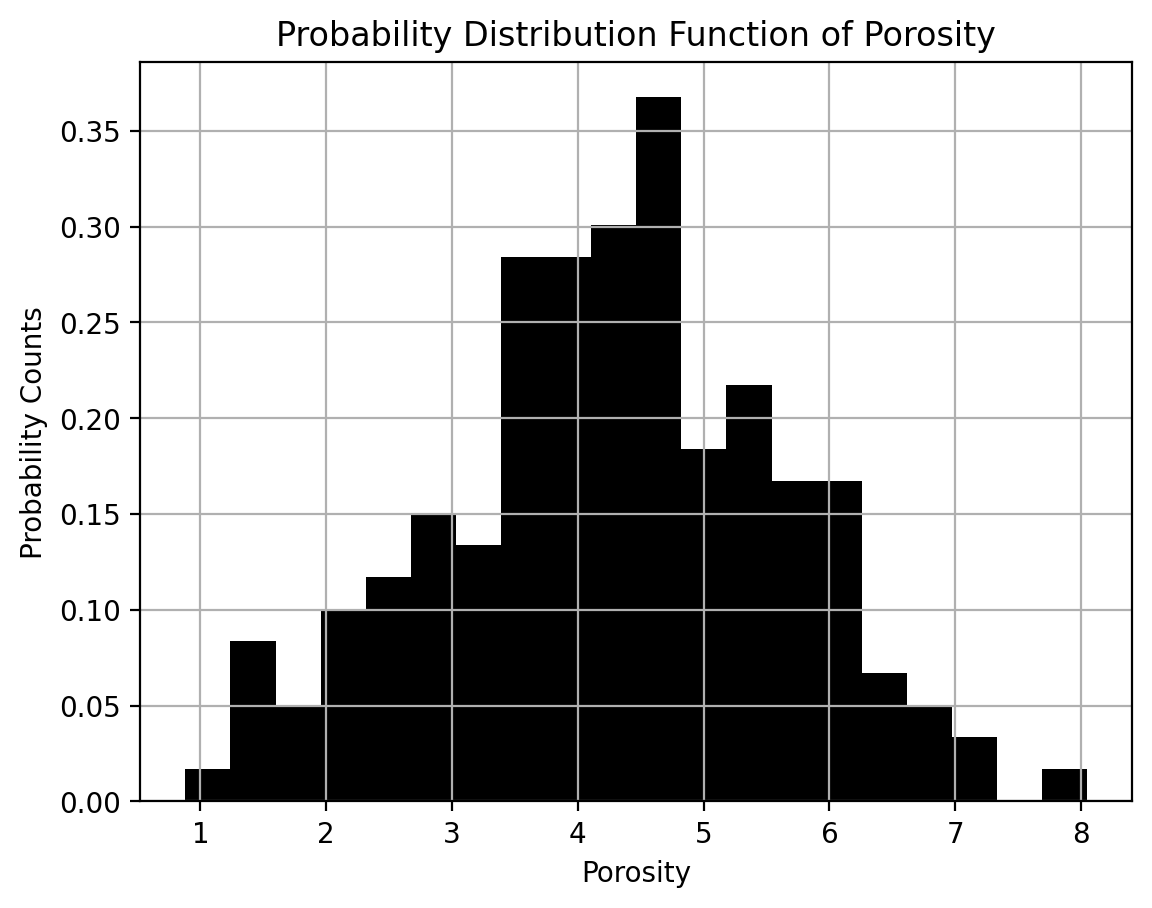

In [21]:
plt.xlabel('Porosity')
plt.ylabel('Probability Counts')
plt.title('Probability Distribution Function of Porosity')


plt.hist(dataframe_subset.CorrectedPorosity, bins = 20, density = 1, color = 'black') 
plt.grid(True)

You can also generate the **Cumulative Distribution Function**, also called the **CDF**.

In [22]:
dataframe_subset.head()

,CorrectedPorosity,TOC,Calcite,Quartz
0,6.67,4.15,0.0,38.6
1,6.07,4.25,6.2,48.6
2,4.91,3.40,2.5,41.0
3,6.00,0.39,66.4,4.6
4,5.63,3.90,0.6,37.0


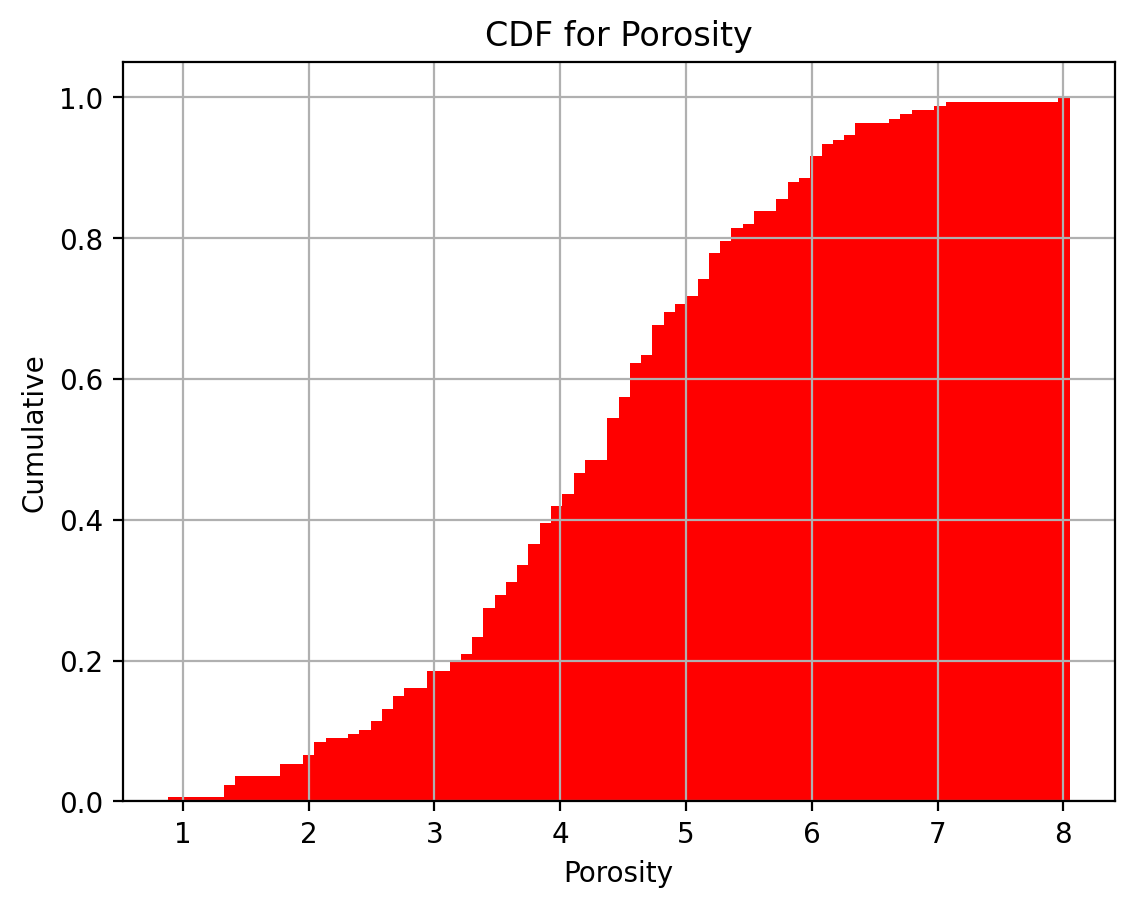

In [26]:
# Generate the CDF for Porosity
plt.xlabel('Porosity')
plt.ylabel('Cumulative')
plt.title('CDF for Porosity')

plt.hist(dataframe_subset.CorrectedPorosity, bins = 80, density = True, cumulative = True, color = 'red')
plt.grid(True)

Why is the CDF important? It gives you percentile values. 

**Question**: Draw the histogram of 'Calcite'. Comment on the distribution. Is it left-skewed, right skewed or symmetic?

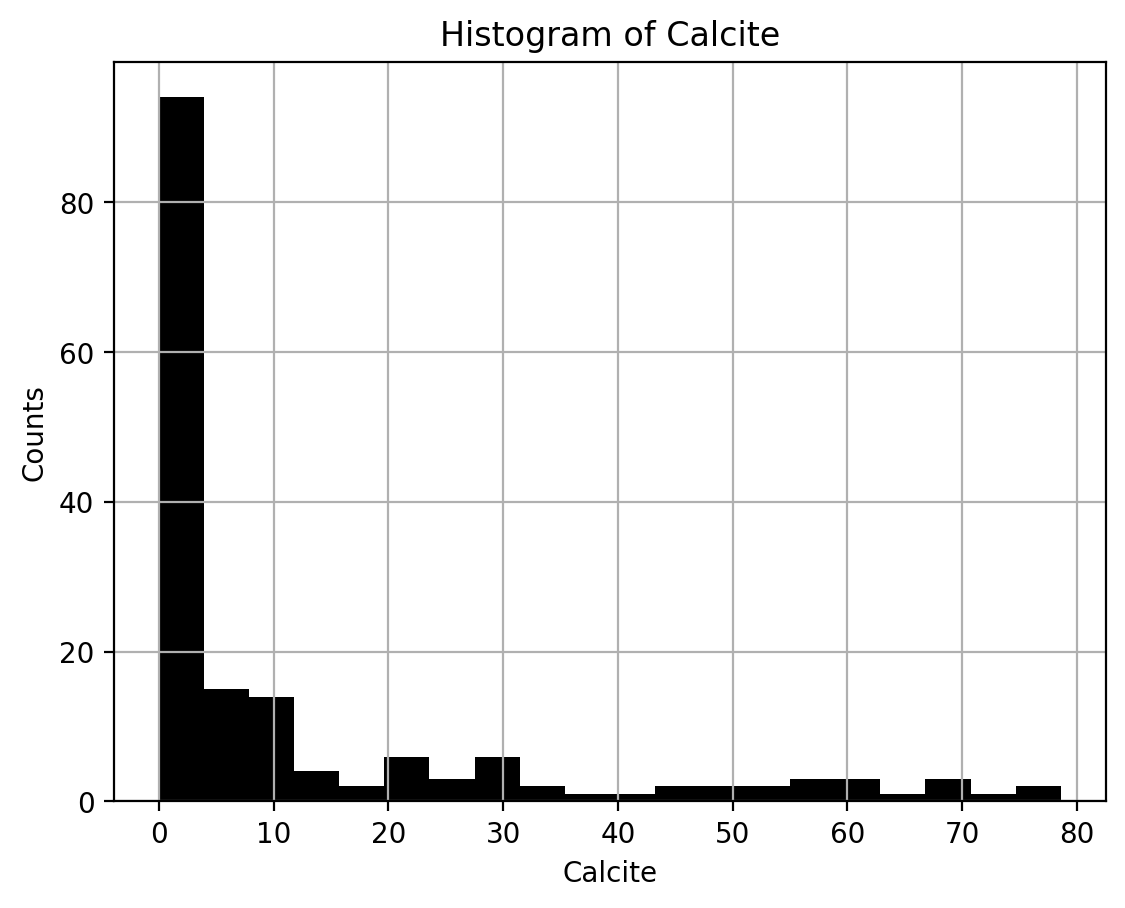

In [34]:
plt.xlabel('Calcite')
plt.ylabel('Counts')
plt.title('Histogram of Calcite')


plt.hist(dataframe_subset.Calcite, bins = 20, density = 0, color = 'black') 
plt.grid(True)

### 2. Using Pandas

Play around with figure size and layout below. 

In [35]:
dataframe_subset.head()

,CorrectedPorosity,TOC,Calcite,Quartz
0,6.67,4.15,0.0,38.6
1,6.07,4.25,6.2,48.6
2,4.91,3.40,2.5,41.0
3,6.00,0.39,66.4,4.6
4,5.63,3.90,0.6,37.0


In [38]:
help(pd.DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data) -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 | 

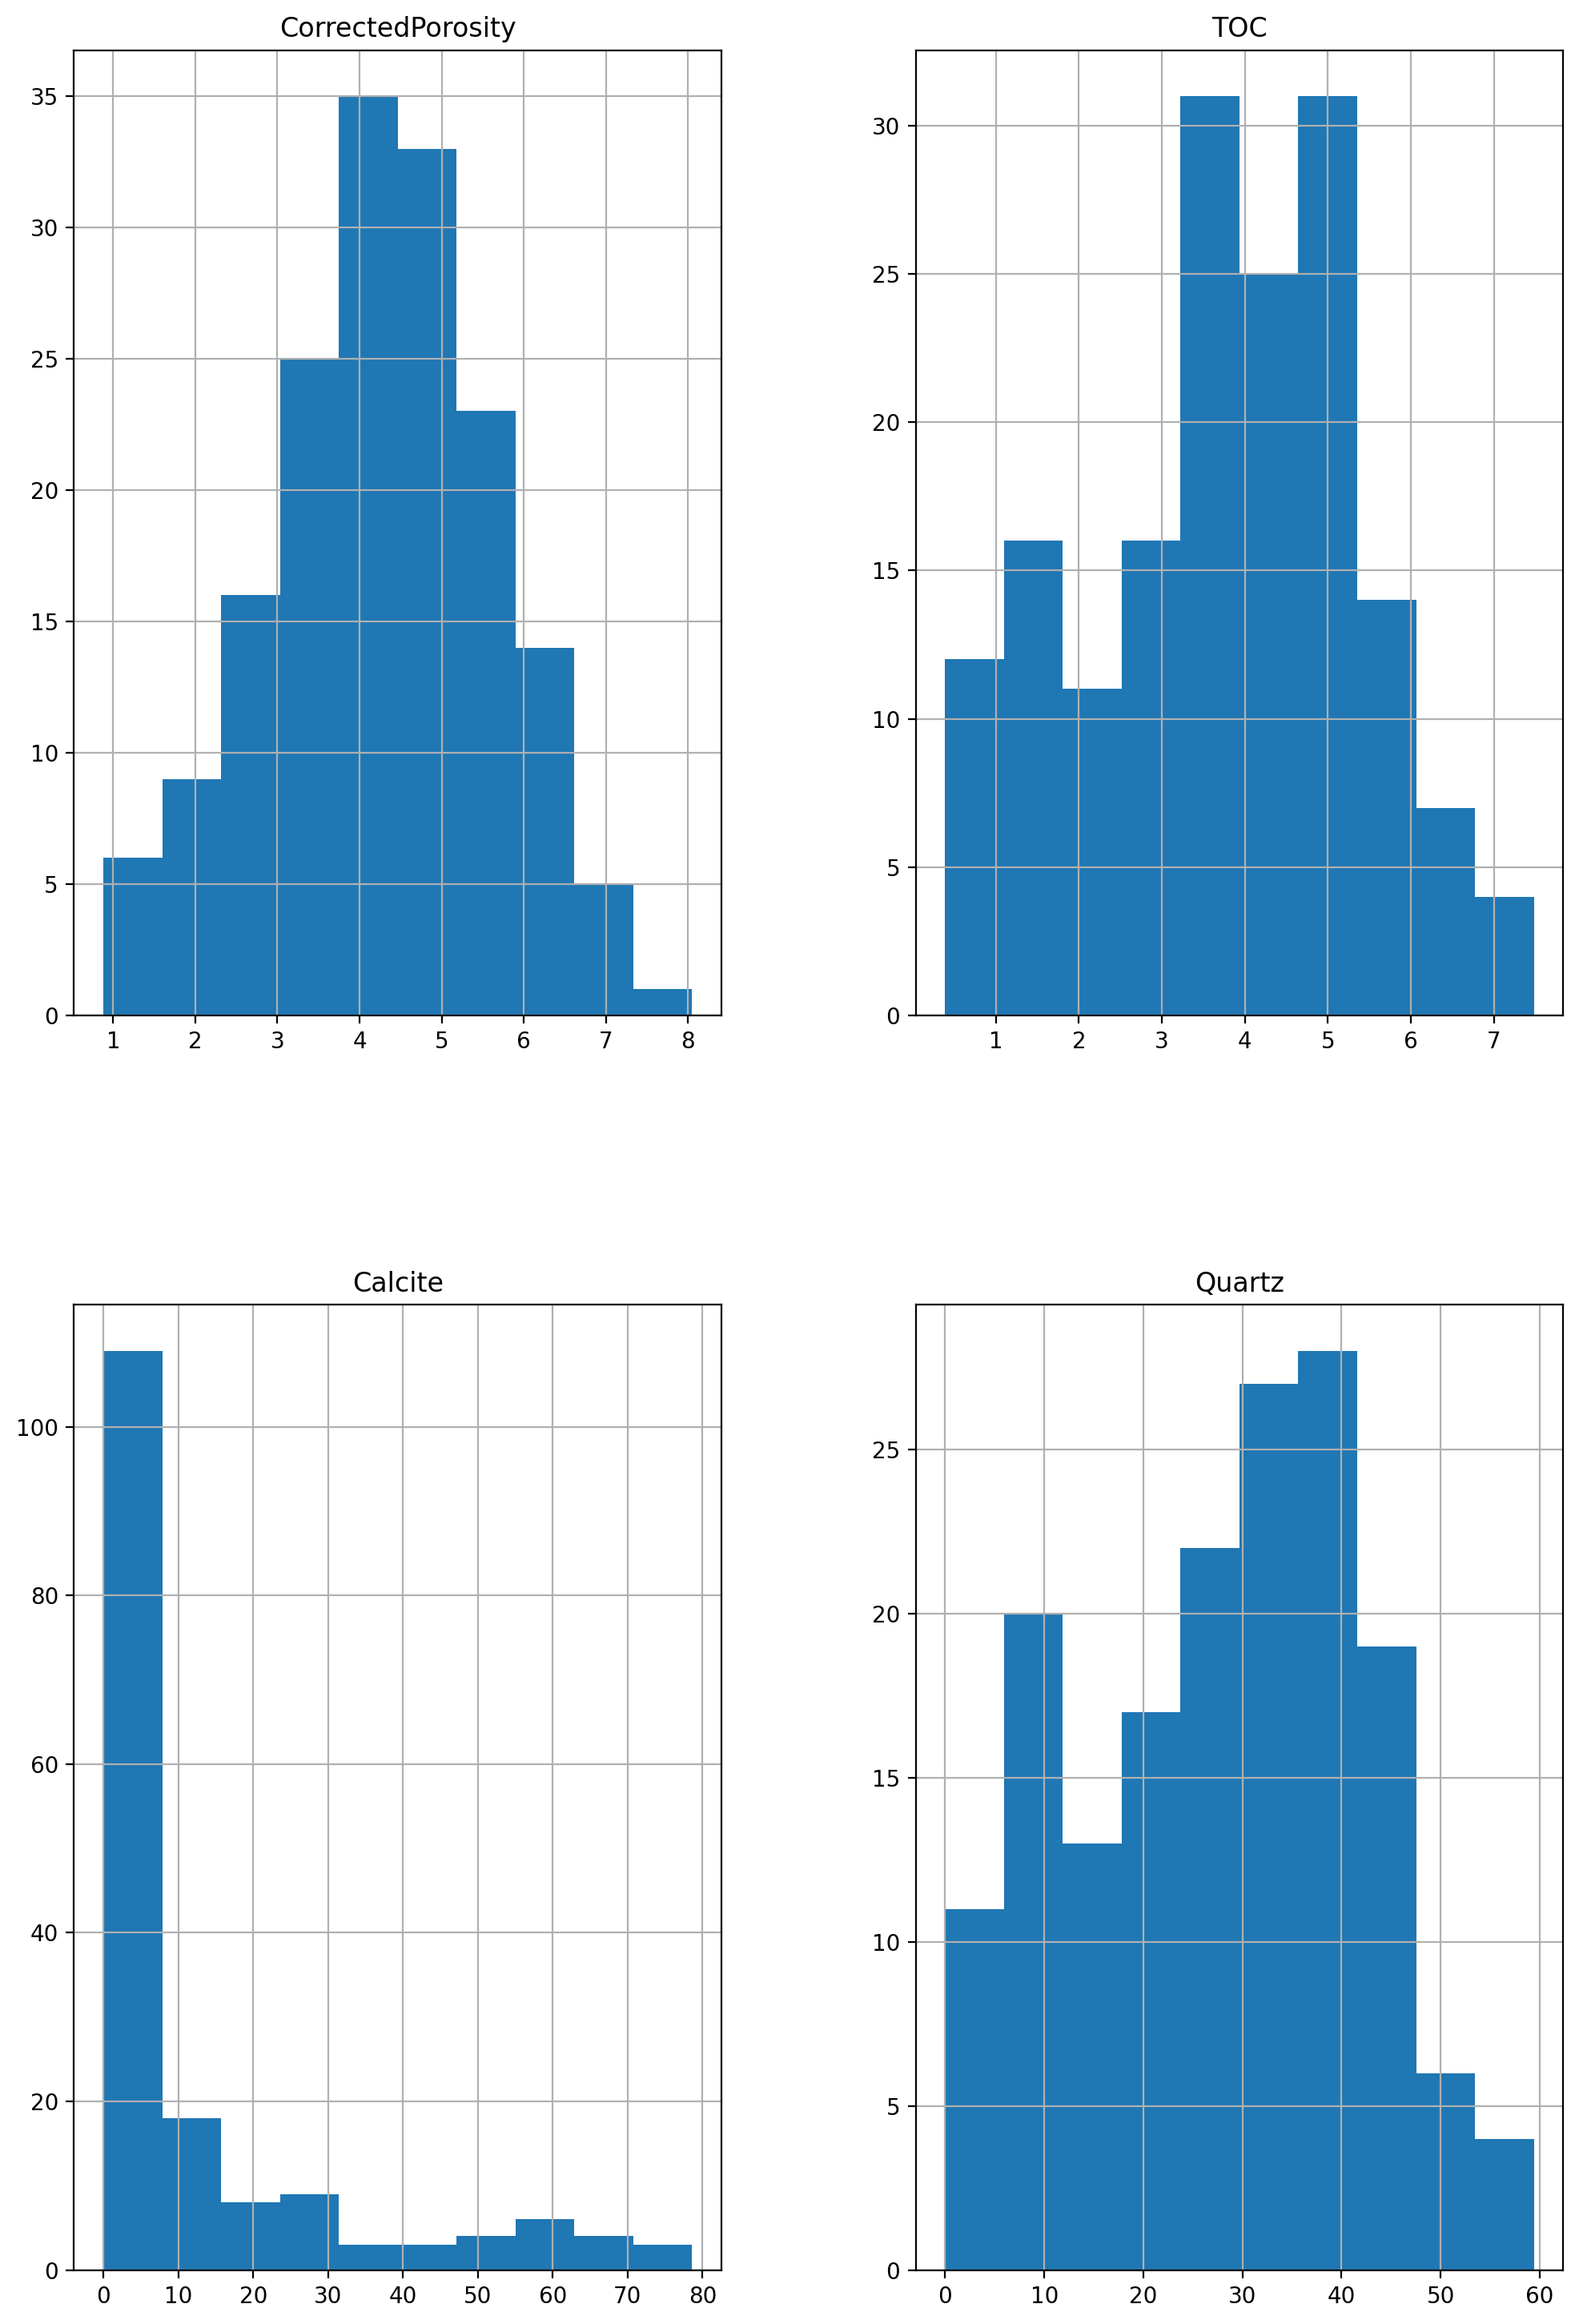

In [45]:
dataframe_subset.hist(figsize = (12, 18), layout = (2, 2));

If you want to plot the histogram of just one of the variables.

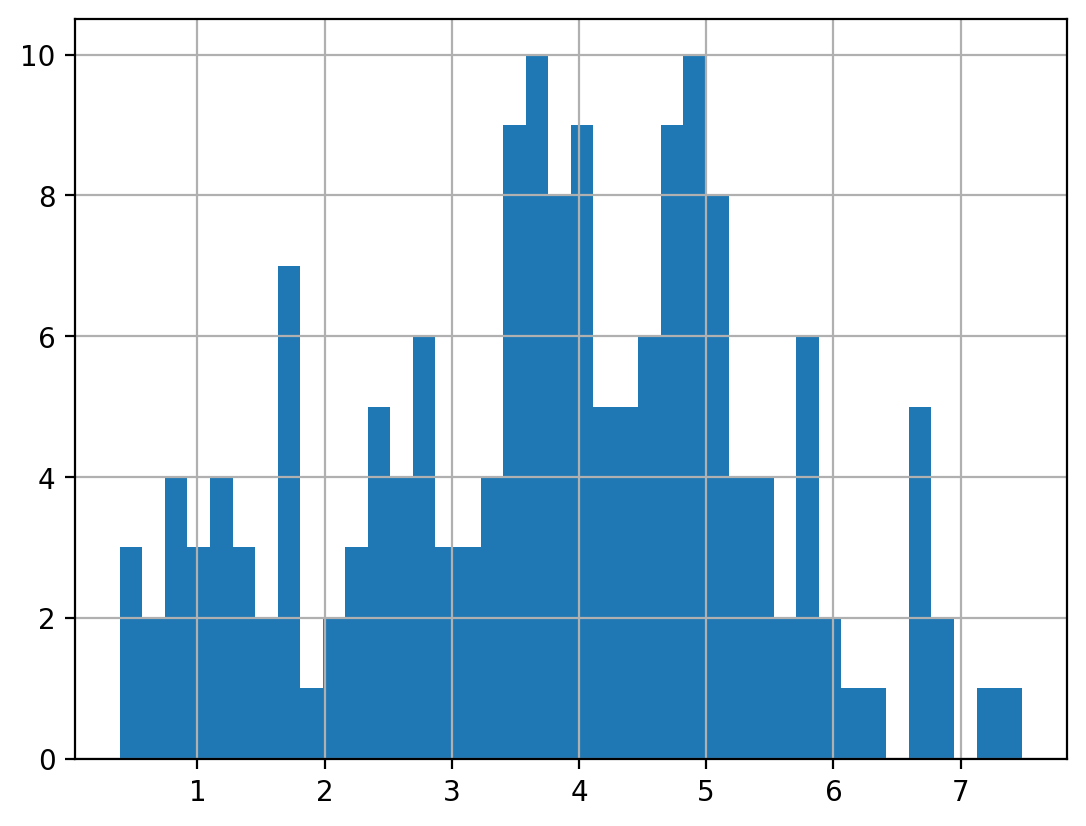

In [52]:
dataframe_subset['TOC'].hist(bins=40);

## Using Seaborn

Seaborn has better appearing histograms than Matplotlib and many more options.

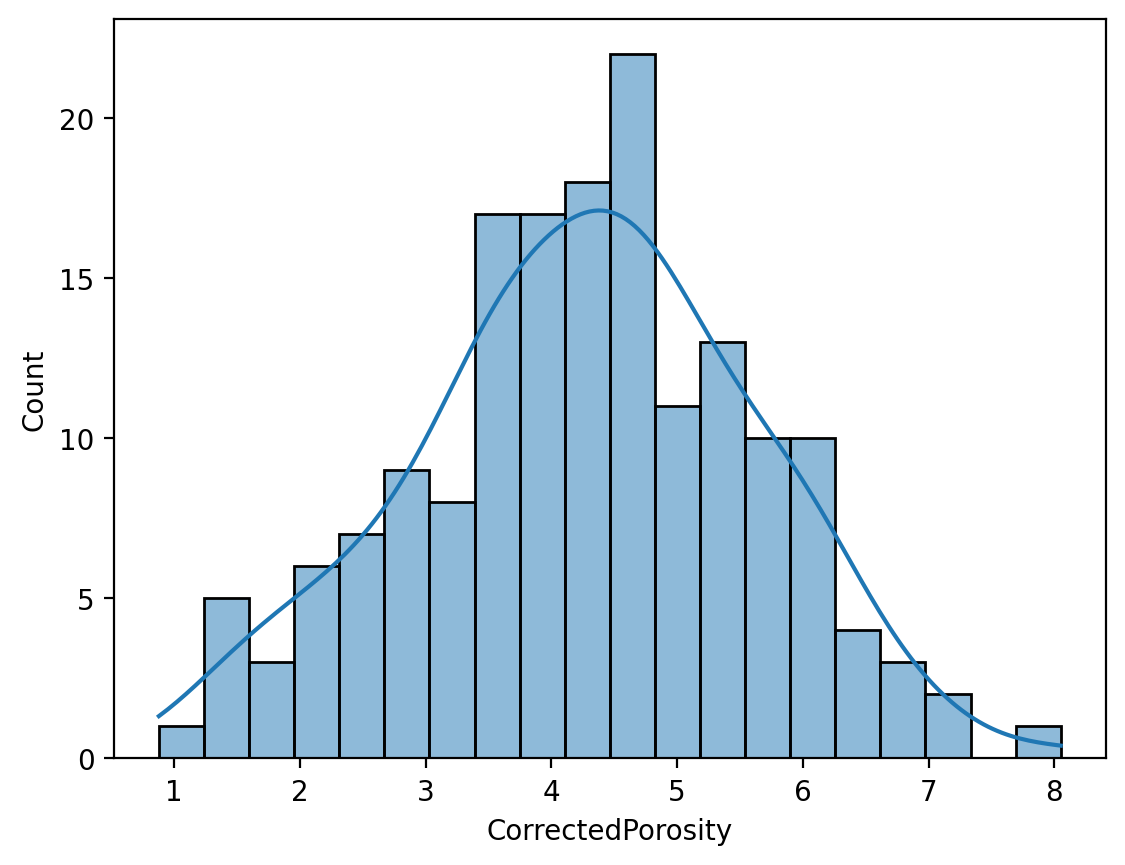

In [60]:
sns.histplot(dataframe['CorrectedPorosity'], kde = 1, bins = 20);

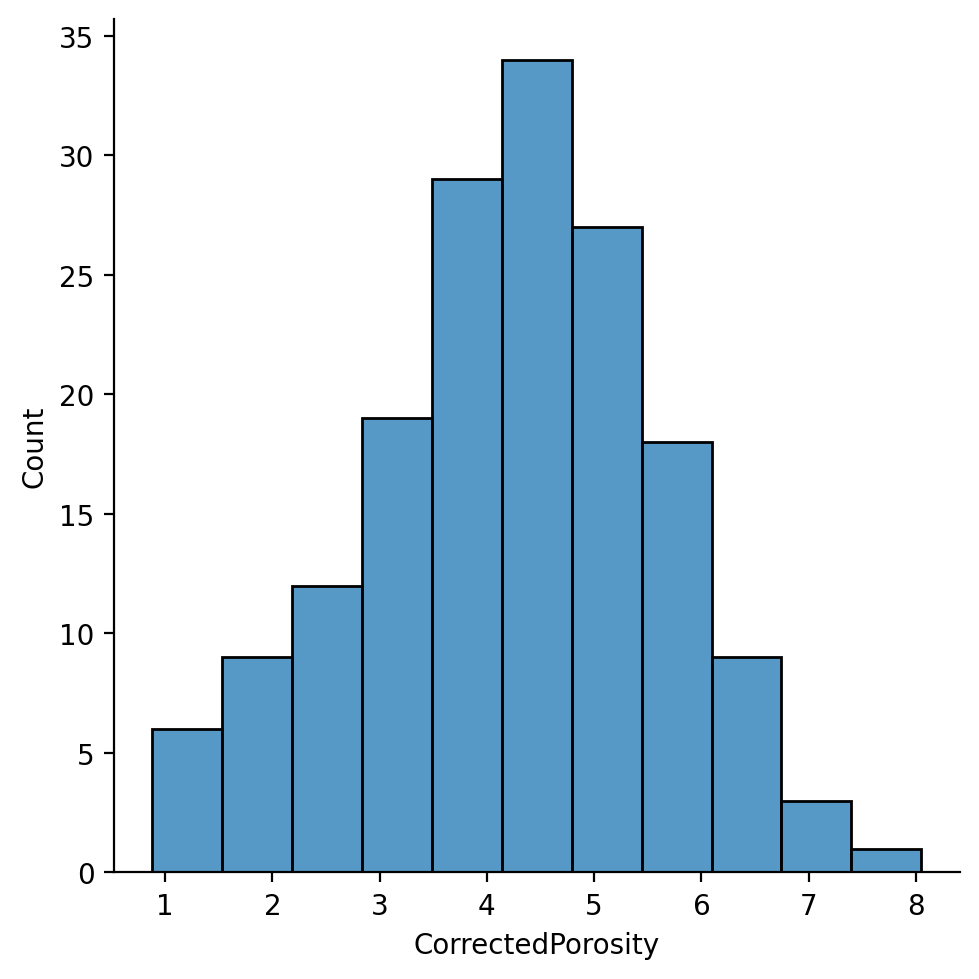

In [59]:
sns.displot(dataframe['CorrectedPorosity']);

In the plot above, Seaborn has plotted the histogram in bins and also provided a **kde: kernel density estimate**, which is a smoothed interpretation of the histogram. While it makes your plot look nice, you should be careful when using it. The **kde = True** option does not include limits on the variable values, so you can get a kernel desnity including negative porosity values, for instance. You can change the default option to limit kde values and I will let you look in to that. 

## 2d Histograms

2D histograms are good for visualizing relatonships between variables. Of course, the information contained in almost no different than a 2d crossplot but the nice thing is you get histograms as well.

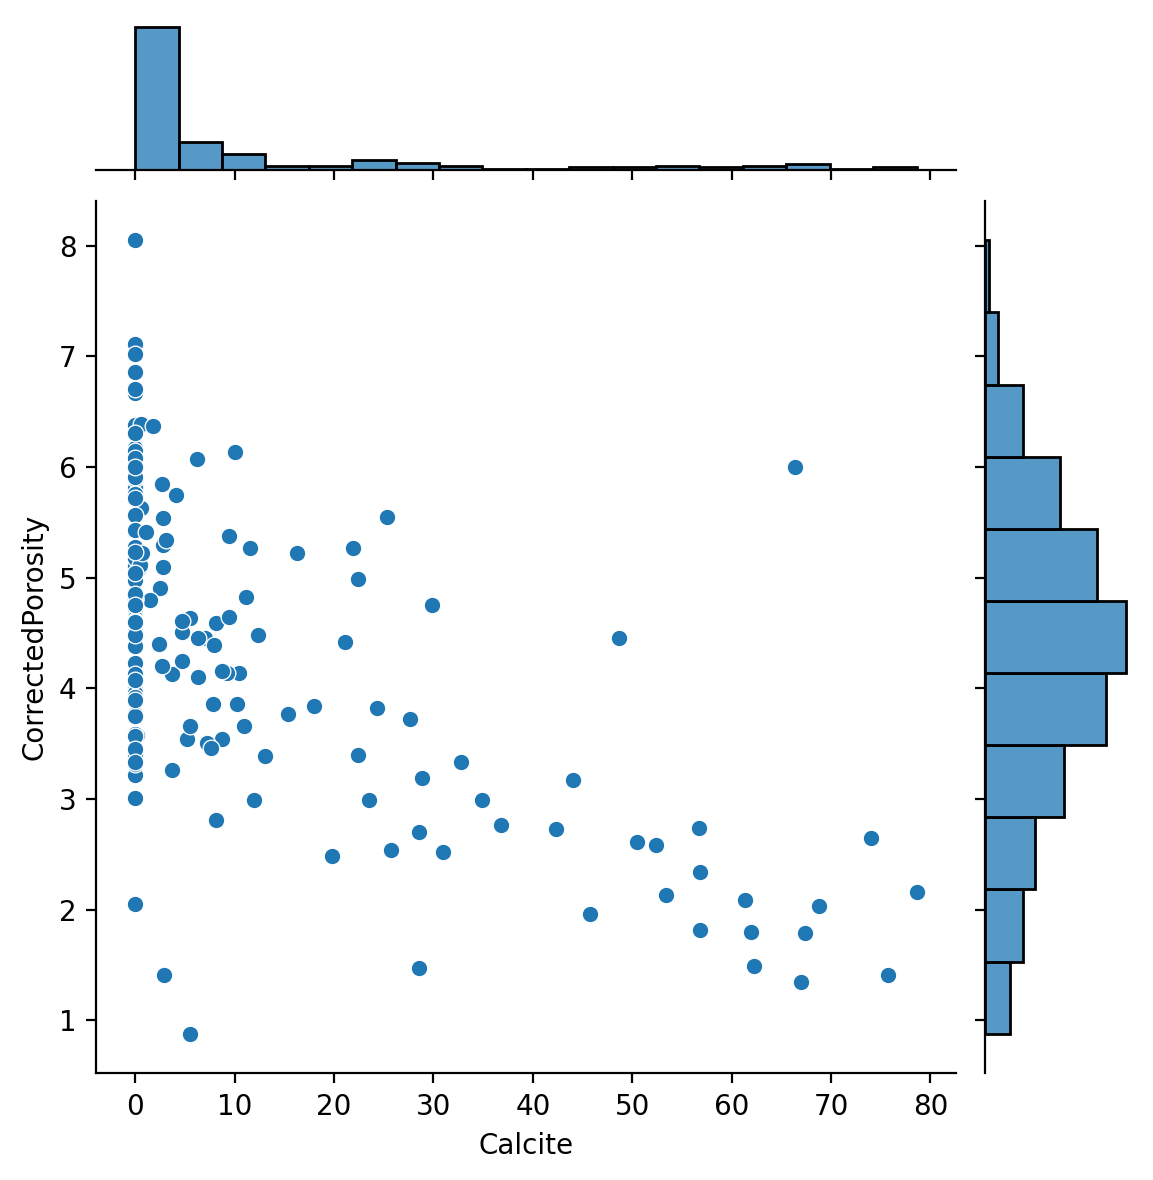

In [65]:
sns.jointplot(x="Calcite", y="CorrectedPorosity", data=dataframe);

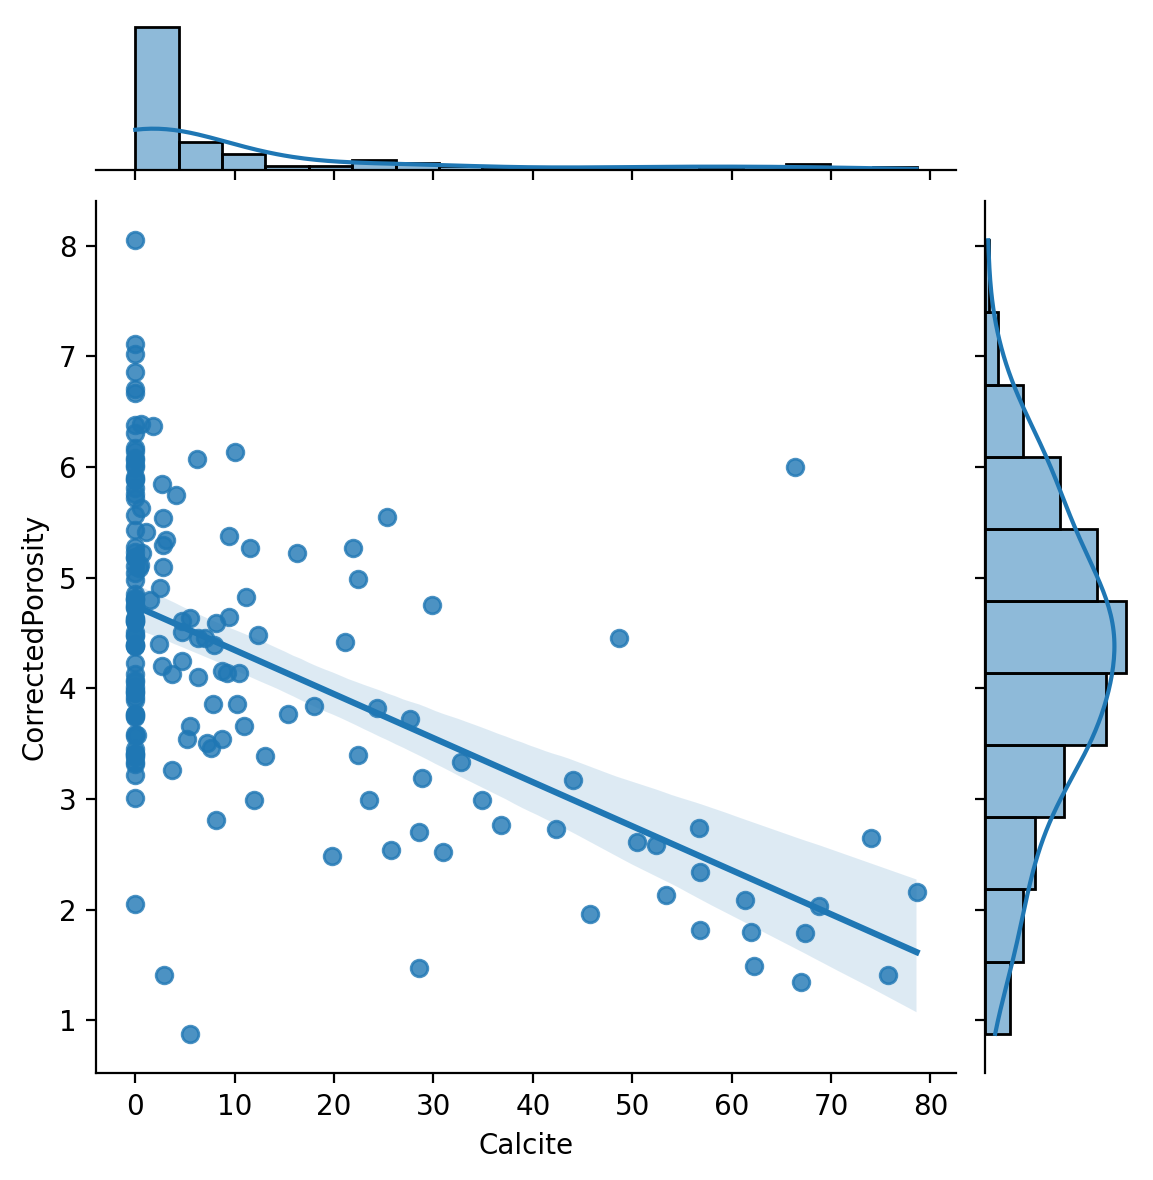

In [70]:
sns.jointplot(x="Calcite", y="CorrectedPorosity", data=dataframe, kind = 'reg');

 # Boxplots
 
 The figure below shows a boxplot for a normal distribution of mean 0 and standard deviation $\sigma$, denoted by the expression: $N(0, \sigma)$


 
 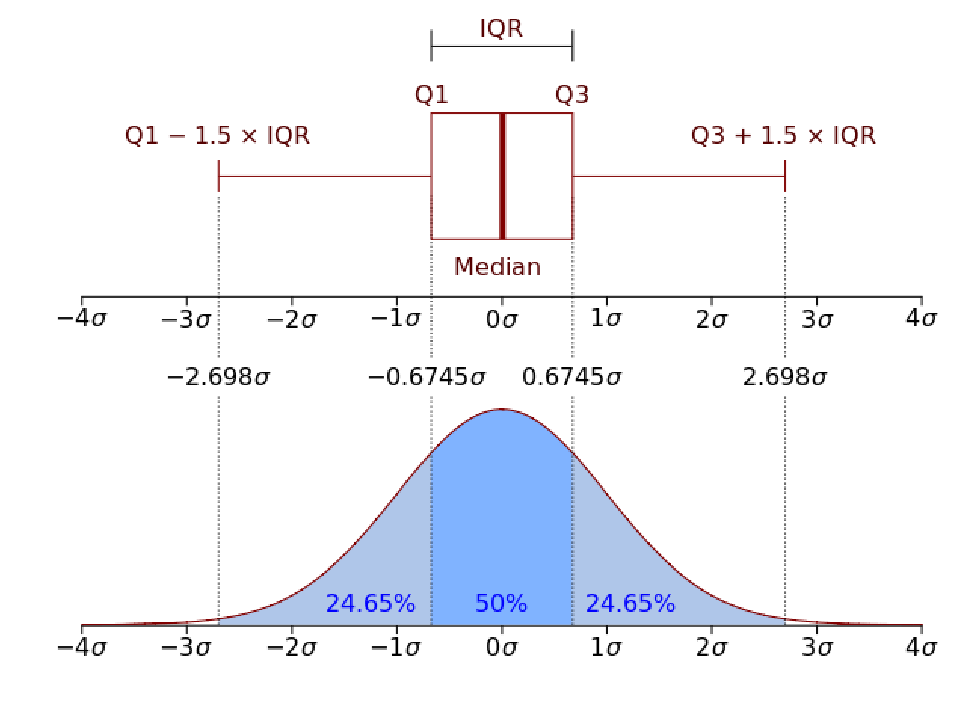

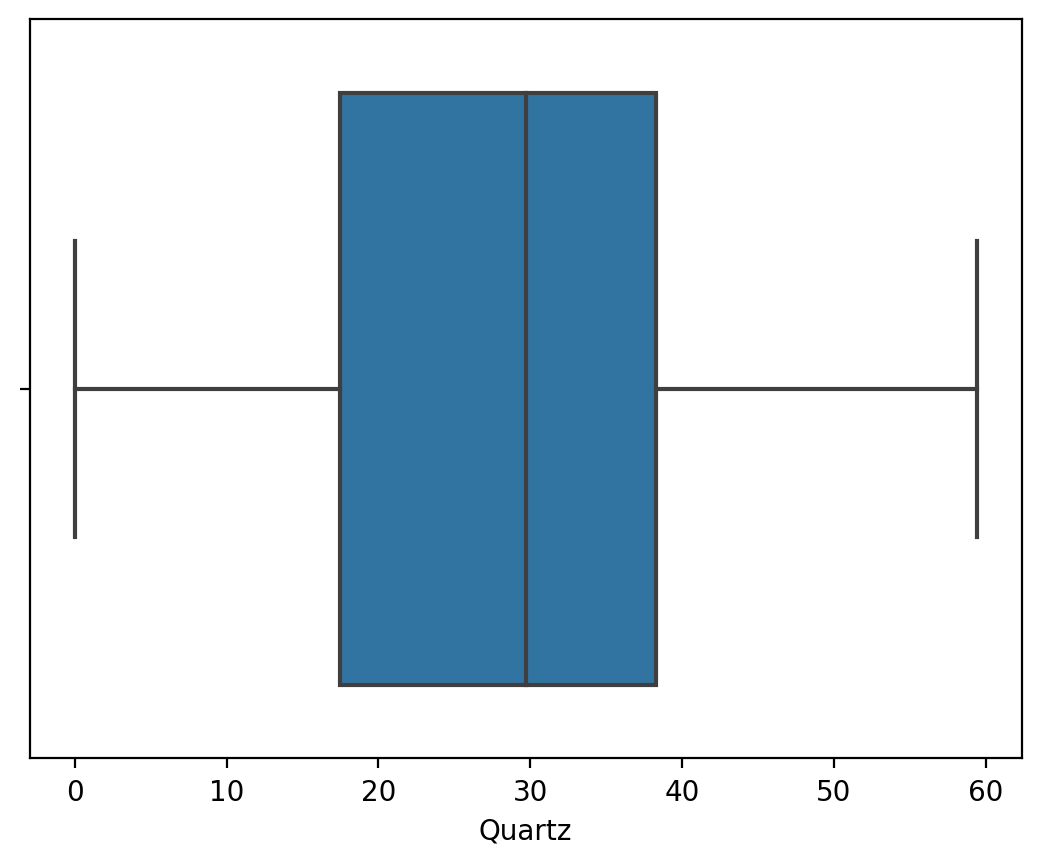

In [73]:
sns.boxplot(x = 'Quartz', data = dataframe);

<Axes: xlabel='Calcite'>

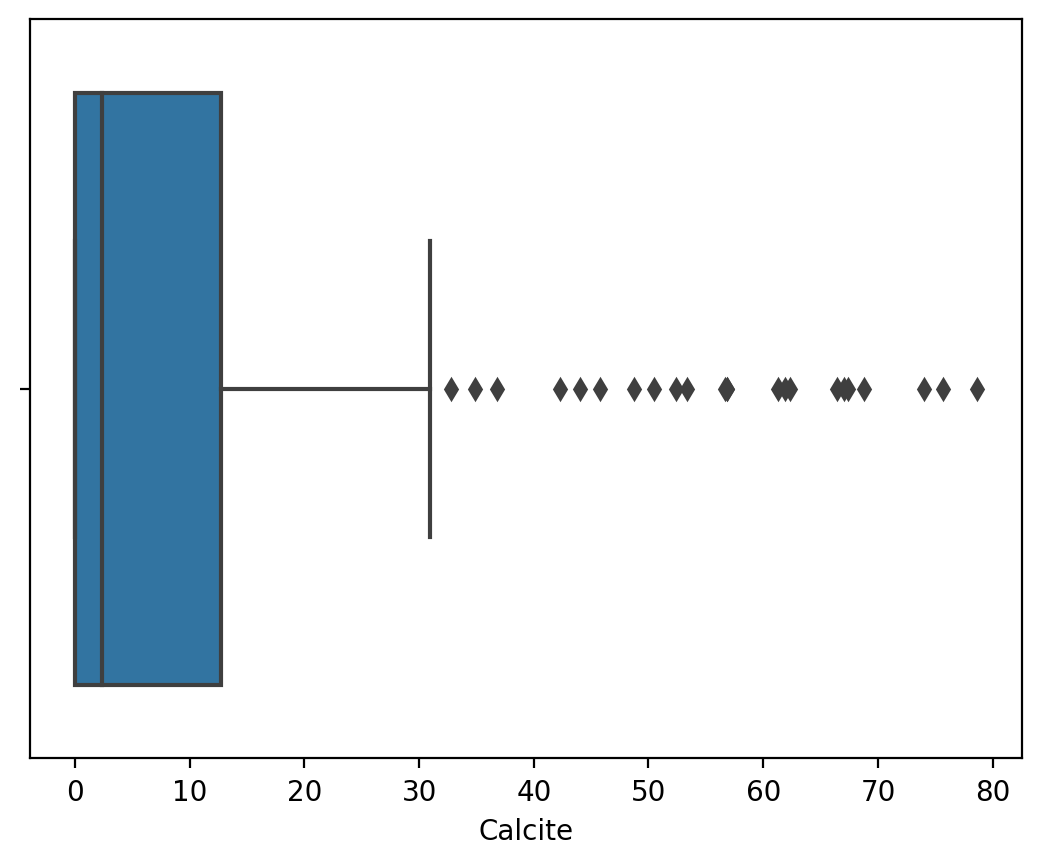

In [75]:
sns.boxplot(x = 'Calcite', data = dataframe)

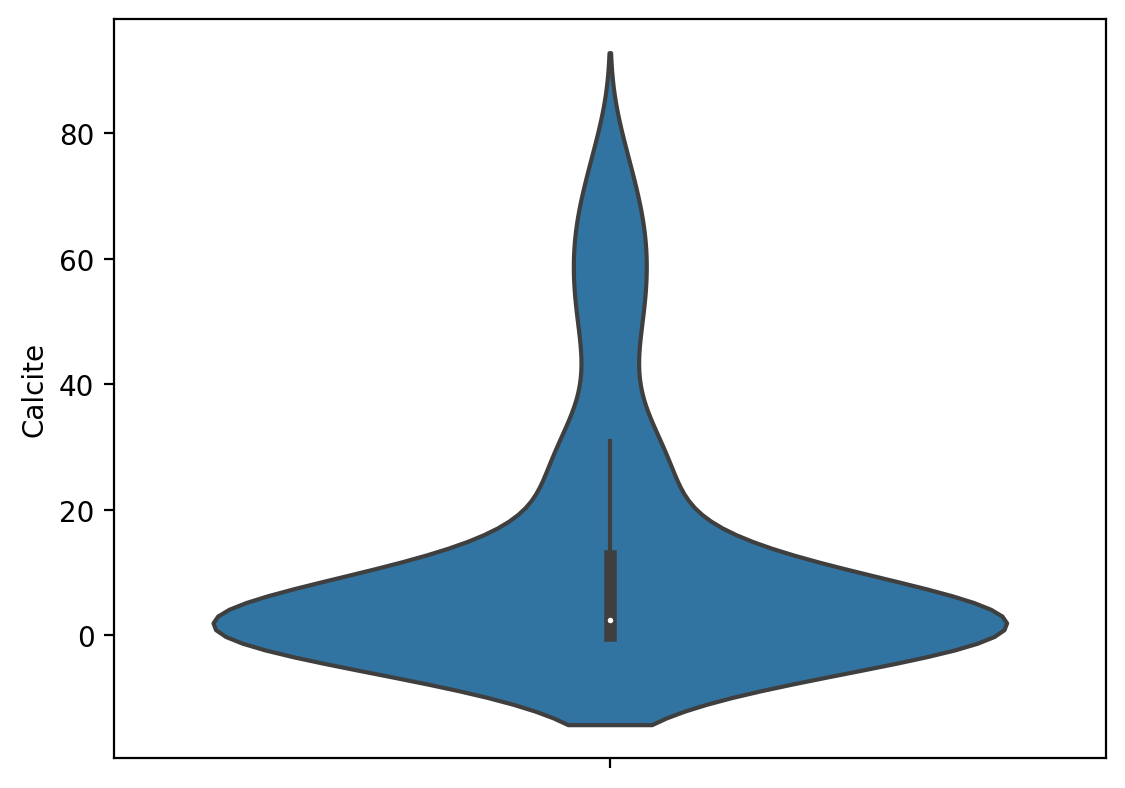

In [77]:
sns.violinplot(y = 'Calcite', data = dataframe);

## Matrix Scatterplot
You should almost always make use of a matrix scatterplot when viewing multidimensional data

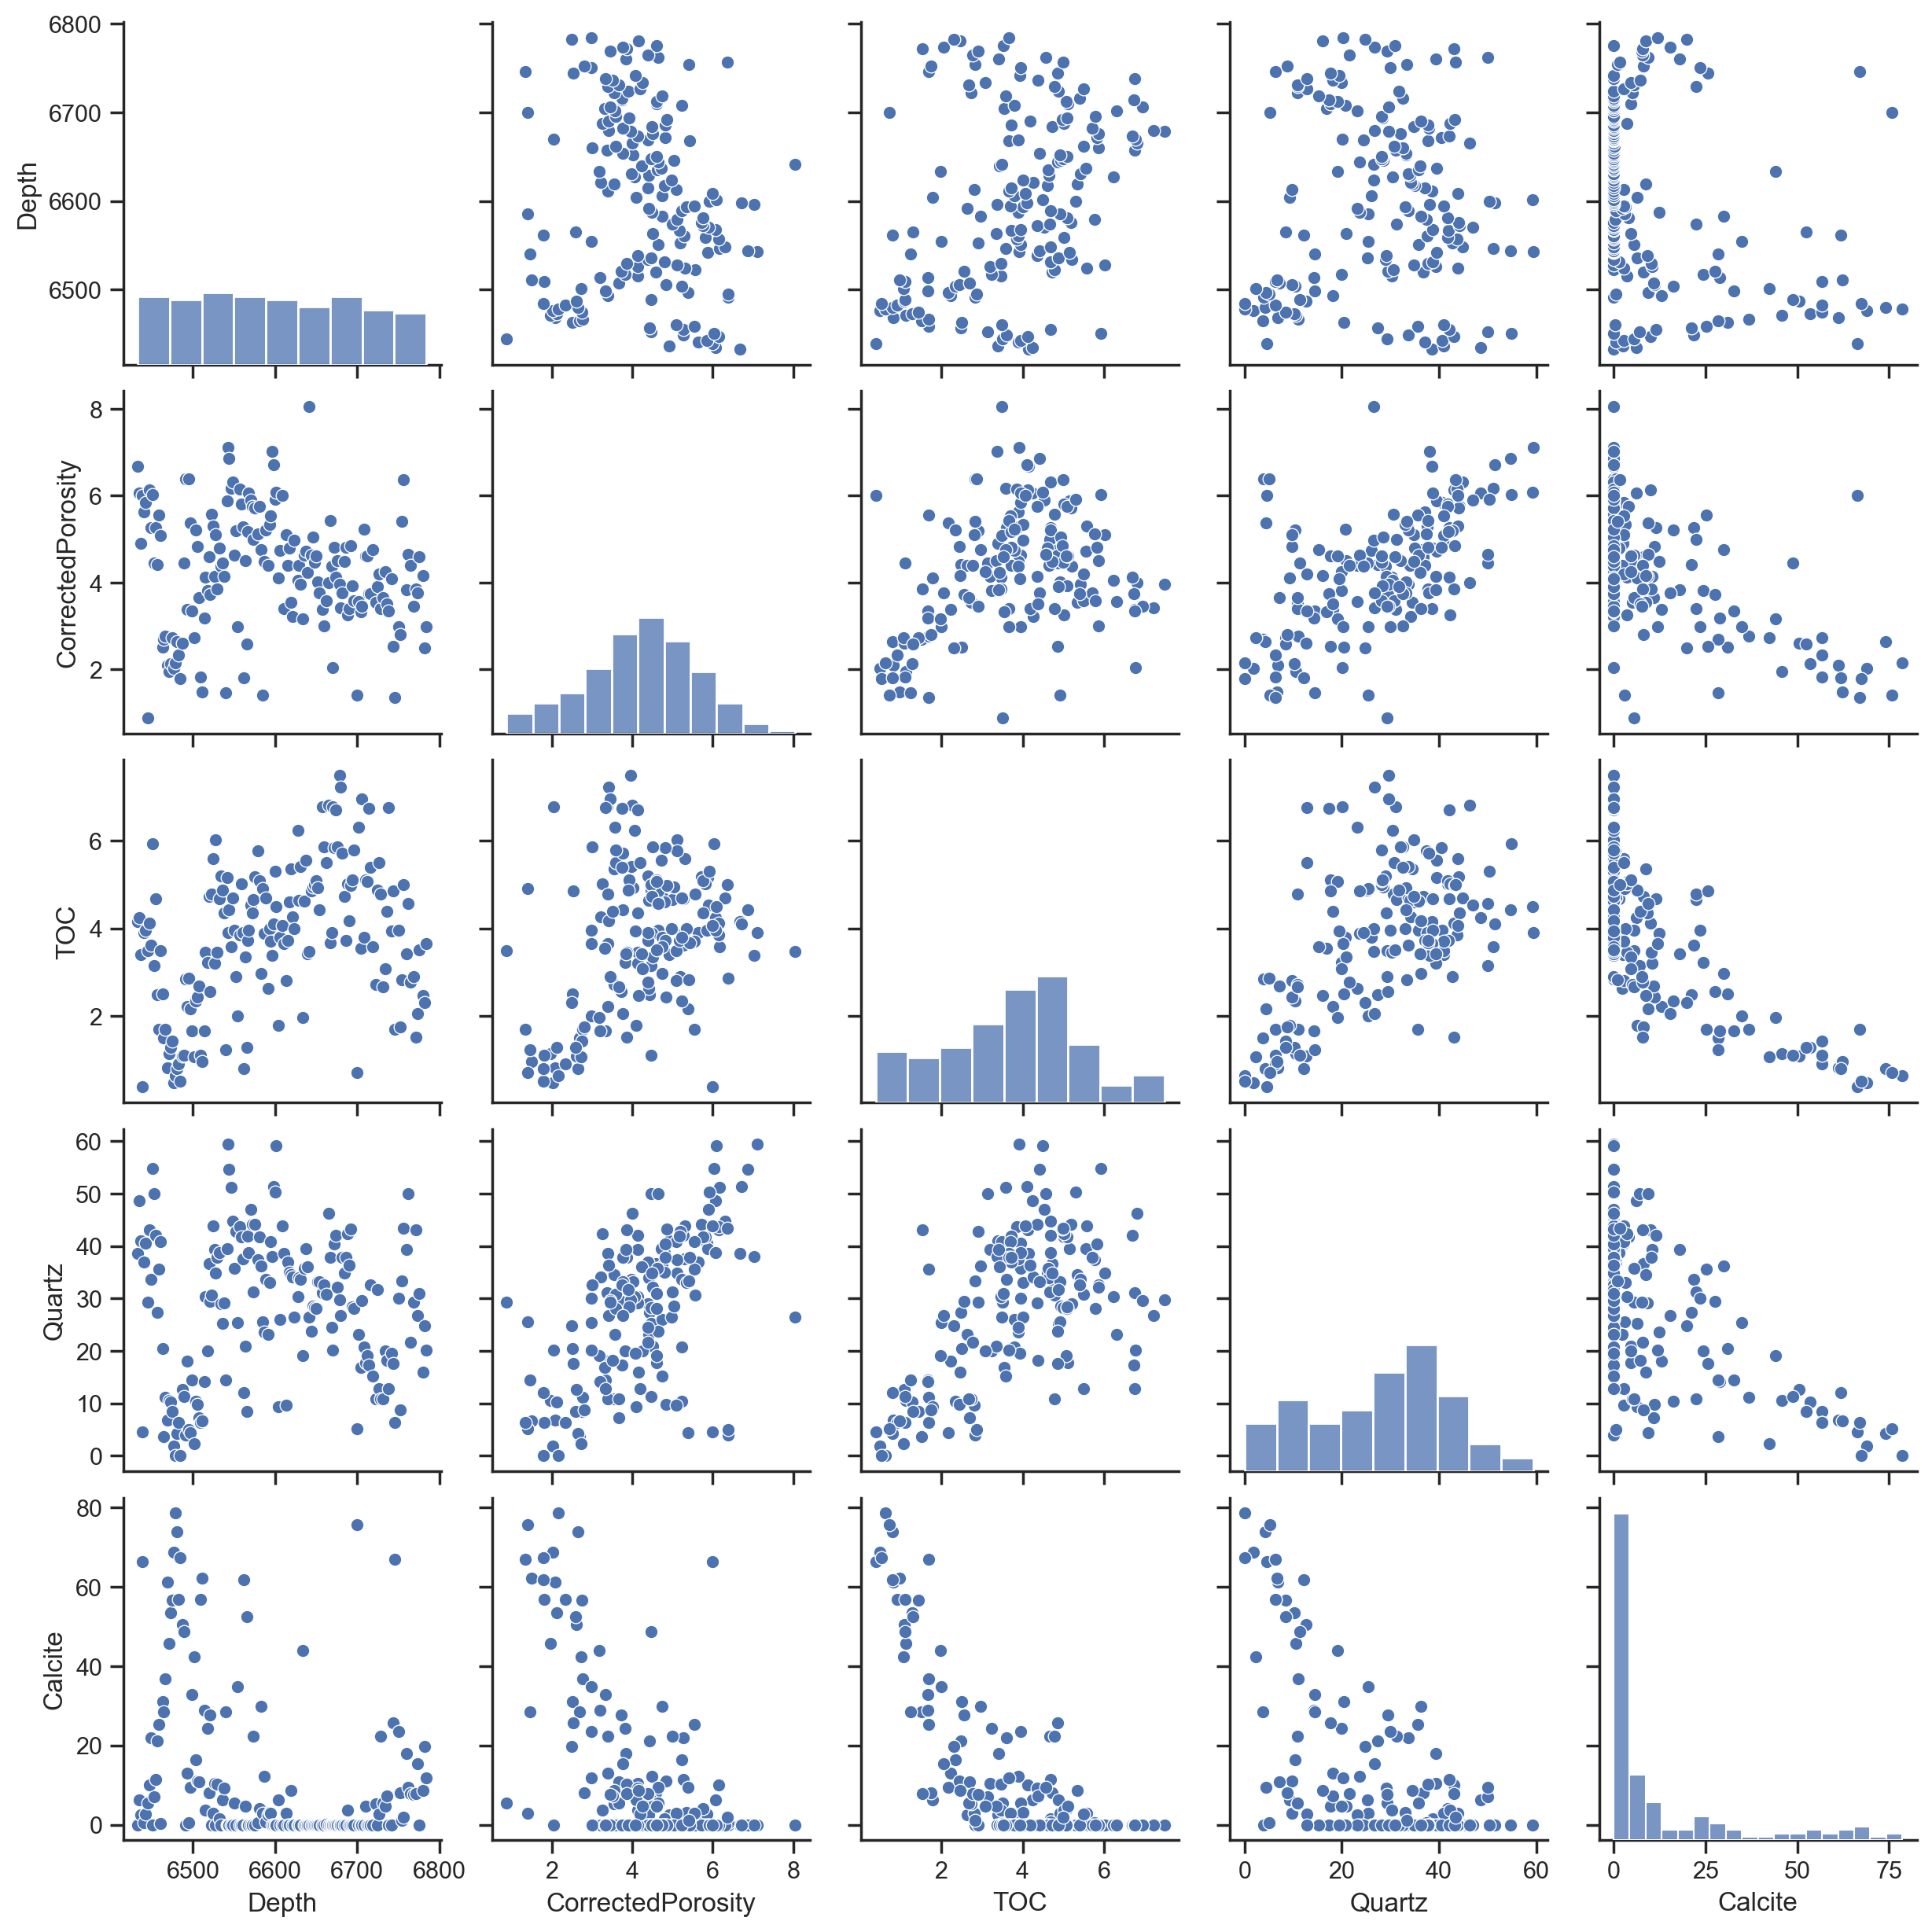

In [78]:
sns.set(style = 'ticks')
sns.pairplot(dataframe)

# Basic Bivariate Statistics

Bivariate statistics relates to the statistics of two variables. You are definitely interested in and should compute univariate statistics, but bivariate statistics is more concerned with relationships between y and x.

In this notebook, I am mostly describing covariance and correlation.

## Covariance

Covariance is the bivariate equivalent of variance for a single random variable. It essentially is the deviation of each data point from the mean on the Y-axis times the deviaton of each data point from the mean on the X-axis.

Recall that the univariate variance is nothing but the deviation of each data point from the mean times the deviation of each data point from the mean.


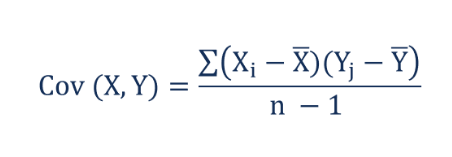




Covariance can be positive or negative. If positive, it implies that deviations of the data from the mean on the Y-axis have the same sign as the deviation of the data from the mean on the X-axis.


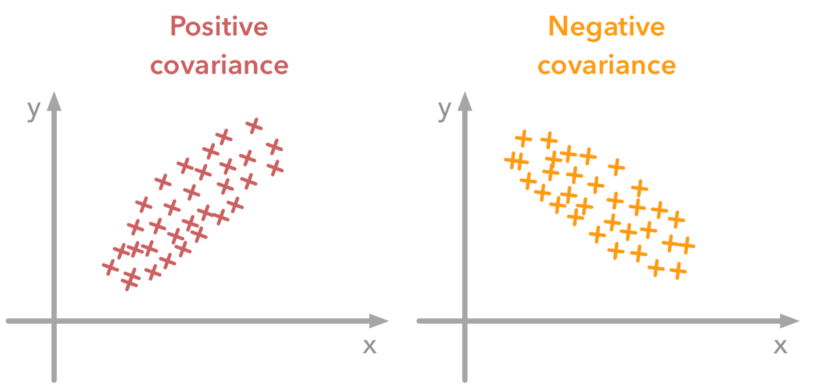

In the figure below, estimate the covariance for each of the 21 cross-plots that you see.

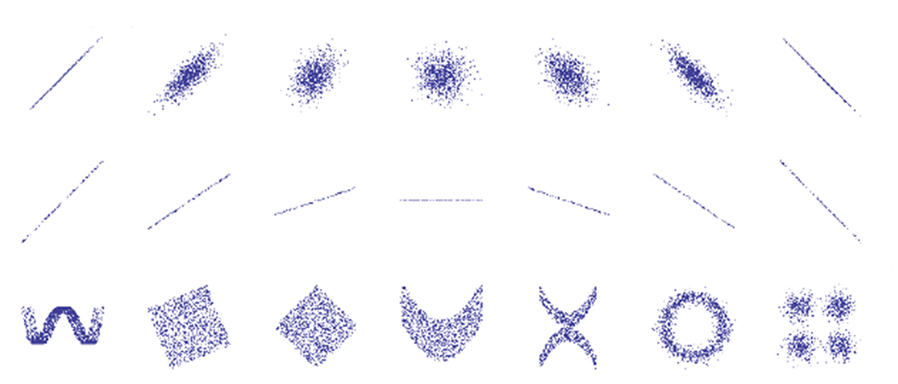

From the figure above, you can see that the covariance is meaningful only for linear relationships. 

## Correlation

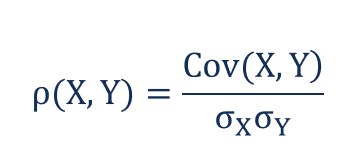

The correlation coefficient always has values between -1 and 1. A perfect 1 or -1 implies that there is no noise in the data, which is unusual, unless Y = X or Y = 5X or Y = 3X + 5. It is a dimensionless quantity. So a correlation coefficient of 0.8 implies a stronger relationship than a correlation coefficient of 0.2. 

## Conclusion

## Project Discussion !